# Lab 9. ANOVA, Tukey's HSD, and linear regression.
We've got a lot to learn. Let's get started.

## Goals
(1) Review visualization: boxplots, stacked histograms  
(2) Review numerical summaries: means, standard deviations   
(3) ANOVA test  
(4) Tukey's HSD  
(5) Regression test  

## Reading in your data
You know how to do this by now. We're going to read in a Zillow dataset on median price per square foot for homes, then take a subset using `filter()`. We are only going to look at the top 10 ranked sized regions in the dataset. Then, we will condense the table into sample statistics.

In [31]:
# * CHUNK NECESSARY
library(readr)
zillow <- read_csv("data/zillow-city-mediansqft.csv")
head(zillow)

Parsed with column specification:
cols(
  .default = col_integer(),
  RegionName = col_character(),
  State = col_character(),
  Metro = col_character(),
  CountyName = col_character()
)
See spec(...) for full column specifications.


In [33]:
# * CHUNK UNNECESSARY
library(reshape2)
zillow <- melt(zillow, id.vars=c("RegionID", "RegionName", "State", "Metro", "CountyName", "SizeRank"))

Here is our dataset. The `variable` column is in YYYY-MM format and `value` is median dollars per square foot for that region.

In [38]:
# * CHUNK NECESSARY
zillow_subset <- zillow %>% filter(SizeRank<=10)
head(zillow_subset)

RegionID RegionName   State Metro                          CountyName  
1  6181    New York     NY    New York                       Queens      
2 12447    Los Angeles  CA    Los Angeles-Long Beach-Anaheim Los Angeles 
3 17426    Chicago      IL    Chicago                        Cook        
4 13271    Philadelphia PA    Philadelphia                   Philadelphia
5 40326    Phoenix      AZ    Phoenix                        Maricopa    
6 18959    Las Vegas    NV    Las Vegas                      Clark       
  SizeRank variable value
1 1        1996-04   NA  
2 2        1996-04  110  
3 3        1996-04   94  
4 4        1996-04   39  
5 5        1996-04   58  
6 6        1996-04   76

And here are the corresponding summary statistics. These are not perfect averages (we are using a subset), just averages based on our dataset.

In [39]:
# * CHUNK NECESSARY
zillow_state  <- zillow_subset %>% 
    group_by(State) %>% 
    summarize(avg_state_median=mean(value, na.rm=TRUE), var_state_median=var(value, na.rm=TRUE))
zillow_state

State avg_state_median var_state_median
1 AZ    102.19841         1024.4704      
2 CA    352.82440        27914.7030      
3 FL     76.63095          369.8911      
4 IL    151.74206         1298.1364      
5 NV    106.98810         1322.7050      
6 NY    364.62500         1198.6068      
7 PA     71.48016          519.4379

## Comparing the states

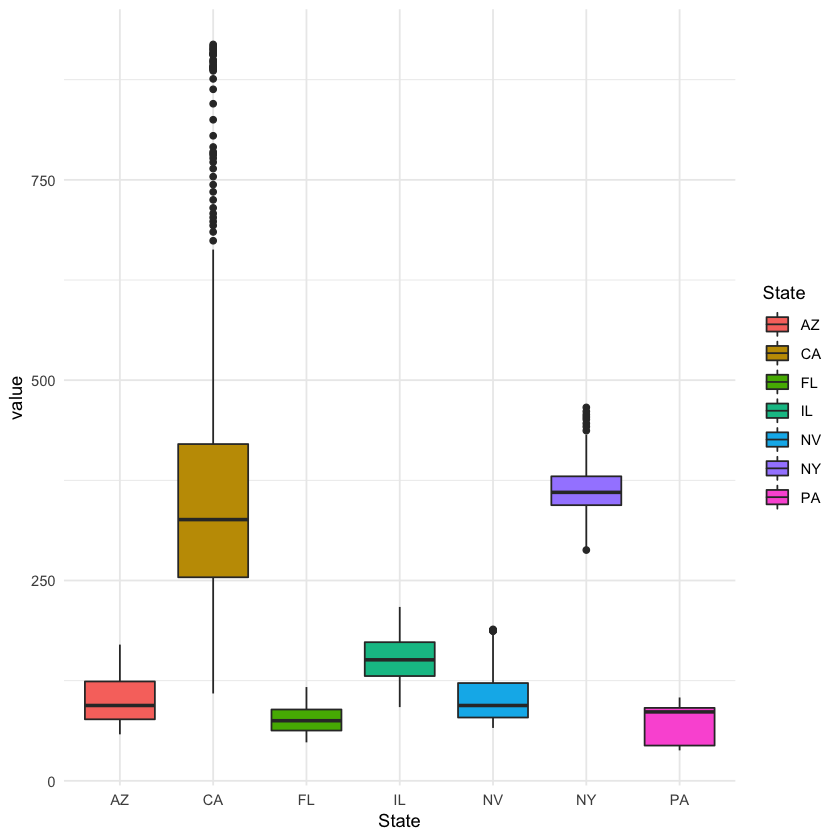

In [93]:
state_subset <- zillow_subset %>% select(State, value) %>% filter(!is.na(value))

library(ggplot2)
ggplot(state_subset, aes(y=value, x=State, fill=State)) + geom_boxplot() + theme_minimal()

In [97]:
model <- lm(value ~ State, data=state_subset)
model


Call:
lm(formula = value ~ State, data = state_subset)

Coefficients:
(Intercept)      StateCA      StateFL      StateIL      StateNV      StateNY  
     102.20       250.63       -25.57        49.54         4.79       262.43  
    StatePA  
     -30.72  


### ANOVA
First, an ANOVA. These are the hypotheses we are interested in.


$H_0:$  All groups have the same mean.    
$H_1:$  At least one of the groups has a different mean.  

**Are our assumptions met?**
Check lecture notes. Regardless, we will continue on to demonstrate code.

In [98]:
library(broom)
anova <- aov(model)
tidy(aov)

term      df   sumsq    meansq      statistic p.value      
1 State        2 23395619 11697809.32 620.2368  2.554194e-197
2 Residuals 1509 28460091    18860.23       NA             NA

### Tukey's HSD
We are going to do a **Tukey's HSD test** to compare these three state's average medians!

$H_0:$  All of the pairwise differences (between the states) are the same.  
$H_1:$  At least one of the differences is different.

**Are our assumptions met?** Check lecture notes. Regardless, we will continue on to demonstrate code.

In [100]:
in_all_honesty <- TukeyHSD(anova)
in_all_honesty %>% tidy()

term  comparison estimate    conf.low    conf.high   adj.p.value 
1  State CA-AZ       250.625992  227.674642  273.577342 0.000000e+00
2  State FL-AZ       -25.567460  -54.598876    3.463956 1.267011e-01
3  State IL-AZ        49.543651   20.512235   78.575067 1.058905e-05
4  State NV-AZ         4.789683  -24.241733   33.821099 9.990213e-01
5  State NY-AZ       262.426587  228.959177  295.893998 0.000000e+00
6  State PA-AZ       -30.718254  -59.749670   -1.686838 3.000300e-02
7  State FL-CA      -276.193452 -299.144802 -253.242103 0.000000e+00
8  State IL-CA      -201.082341 -224.033691 -178.130992 0.000000e+00
9  State NV-CA      -245.836310 -268.787659 -222.884960 0.000000e+00
10 State NY-CA        11.800595  -16.554455   40.155646 8.833586e-01
11 State PA-CA      -281.344246 -304.295596 -258.392896 0.000000e+00
12 State IL-FL        75.111111   46.079695  104.142527 0.000000e+00
13 State NV-FL        30.357143    1.325727   59.388559 3.357299e-02
14 State NY-FL       287.994048  254.526637  321.461458 0.000000e+00
15 State PA-FL        -5.150794  -34.182210   23.880622 9.985213e-01
16 State NV-IL       -44.753968  -73.785384  -15.722552 1.151815e-04
17 State NY-IL       212.882937  179.415526  246.350347 0.000000e+00
18 State PA-IL       -80.261905 -109.293321  -51.230489 0.000000e+00
19 State NY-NV       257.636905  224.169494  291.104315 0.000000e+00
20 State PA-NV       -35.507937  -64.539353   -6.476521 5.796398e-03
21 State PA-NY      -293.144841 -326.612252 -259.677431 0.000000e+00

## Linear regression
We made scatterplots and lines through them earlier on in the class. Now, we're going to do formal testing on the parameters of our linear regression line.

### Queens, NY
This is where my grandma lives, so I'm motivated to talk about home prices near my queen in Queens.

In [281]:
queens <- zillow %>% filter(CountyName=="Queens") %>% filter(!is.na(value)) %>% select(variable, value)
queens <- queens[seq(from=1, to=nrow(queens), by=6),]

In [282]:
# * CHUNK UNNECESSARY
queens <- queens %>% mutate(variable=as.numeric(gsub("-0[0-9]","",variable)))
queens[seq(1, nrow(queens), by=2),1] <- queens[seq(1, nrow(queens), by=2),1] + 0.5
head(queens)

variable value
1 2004.5   288  
2 2005.0   296  
3 2005.5   317  
4 2006.0   354  
5 2006.5   383  
6 2007.0   385

We'll draw the line of best fit on top of the scatterplot. Does it look good?

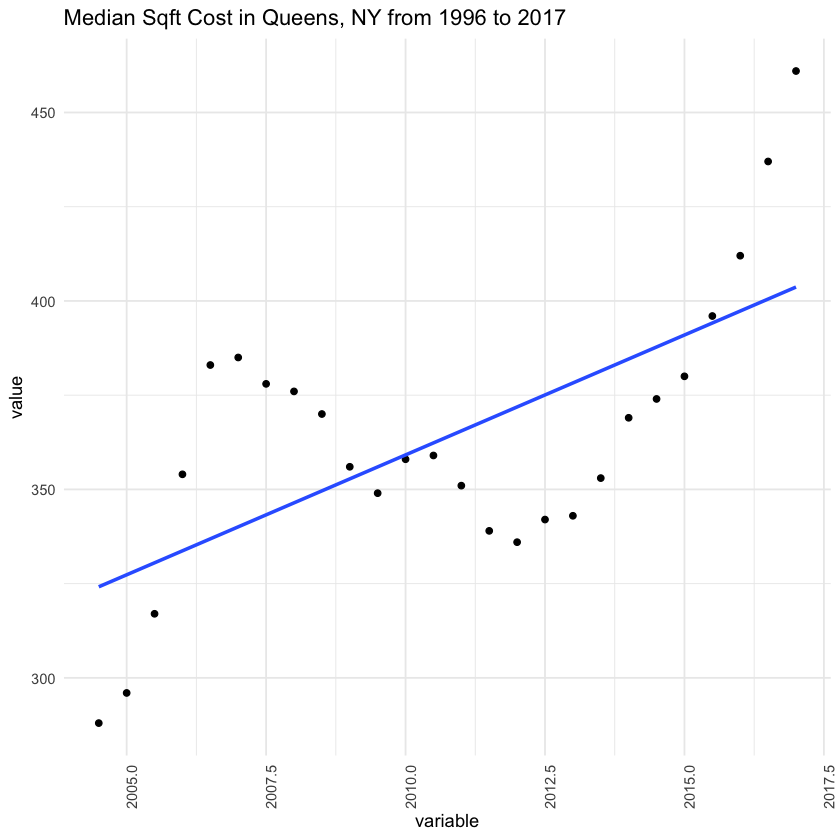

In [283]:
ggplot(queens, aes(x=variable, y=value)) + 
    geom_point() + 
    geom_smooth(method="lm", se=FALSE) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle("Median Sqft Cost in Queens, NY from 1996 to 2017")

To me, the above looks like trash. The below (which we will observe but not write any calculations for in this class) looks better.

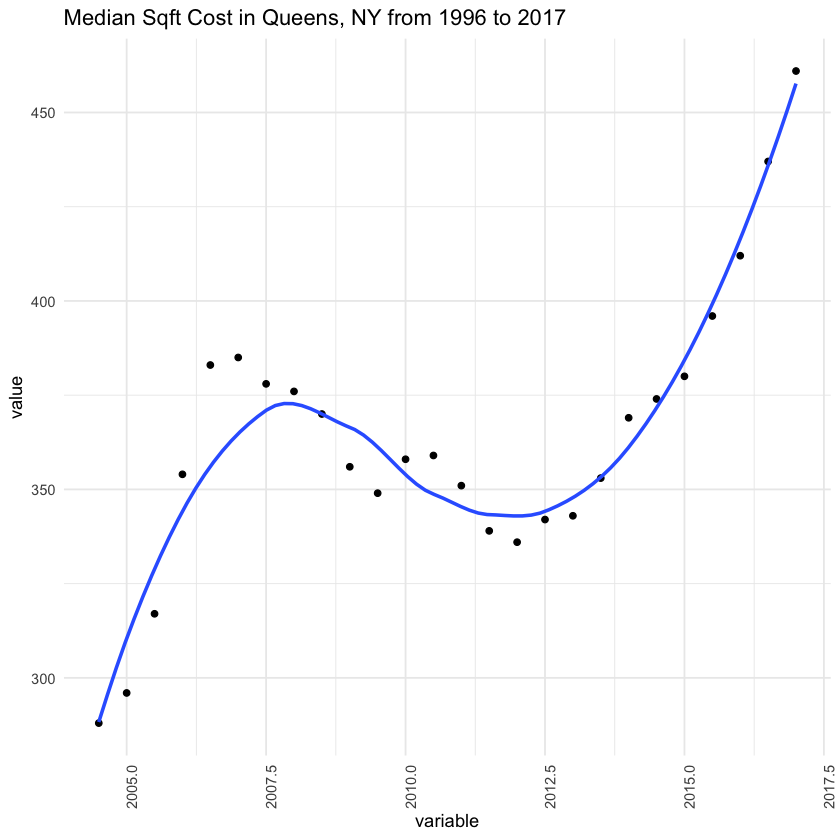

In [234]:
ggplot(queens, aes(x=variable, y=value)) + 
    geom_point() + 
    geom_smooth(method="loess", se=FALSE) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle("Median Sqft Cost in Queens, NY from 1996 to 2017")

We want to test the hypotheses based on the linear regression of Y (median price per sqft) and X (the year).


$H_0: \beta_1=0$  
$H_1: \beta_1 \neq 0$  

**WAAARNNIIINGGG!** *You must be responsible with your data*! The trend does not even look linear in the first place! If you're doing any predictions like this in practice, **use time series analysis instead**. This will require you a combination of modelling techniques beyond the scope of this class. But of course, again, for pedagogical reasons, we will continue with the example.

**Are our assumptions met?** Check lecture notes. Regardless, we will continue on to demonstrate code.

In [286]:
queens_model <- lm(value ~ variable, data=queens)
queens_model %>% tidy()

term        estimate      std.error   statistic p.value     
1 (Intercept) -12427.884103 3074.139000 -4.04272  0.0004729643
2 variable         6.361709    1.528849  4.16111  0.0003504263

Check it out.

$$
\bar{x} \pm t*\text{SE} \implies 6.3617 \pm t*(1.5288)
$$

In [334]:
qt(0.975, df=nrow(queens)-2)

[1] 2.063899

$$
\bar{x} \pm t*\text{SE} \implies 6.3617 \pm 2.063(1.5288)
$$

In [288]:
queens_model %>% glance()

r.squared adj.r.squared sigma    statistic p.value      df logLik   
value 0.4190948 0.3948905     29.23362 17.31483  0.0003504263 2  -123.6102
      AIC      BIC      deviance df.residual
value 253.2203 256.9946 20510.51 24

In [289]:
queens_model %>% summary()


Call:
lm(formula = value ~ variable, data = queens)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.162 -25.213  -5.152  20.367  57.316 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12427.884   3074.139  -4.043 0.000473 ***
variable         6.362      1.529   4.161 0.000350 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.23 on 24 degrees of freedom
Multiple R-squared:  0.4191,	Adjusted R-squared:  0.3949 
F-statistic: 17.31 on 1 and 24 DF,  p-value: 0.0003504


## References
**Mann-Whitney**: https://data.library.virginia.edu/the-wilcoxon-rank-sum-test/